In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [5]:
train_data['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

(array([121584., 124965., 129211., 125038., 133734., 126810., 116707.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

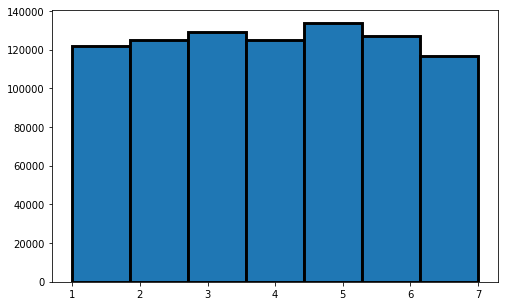

In [41]:
plt.figure(figsize=(8,5))
plt.hist(train_data['DayOfWeek'],align='mid',bins=7,edgecolor='black',linewidth=2.9)

In [23]:
day = {
    'Friday':5,
    'Saturday':6,
    'Sunday':7,
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4
}
train_data['DayOfWeek']=train_data['DayOfWeek'].map(day)

(array([121584., 124965., 129211., 125038., 133734., 126810., 116707.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

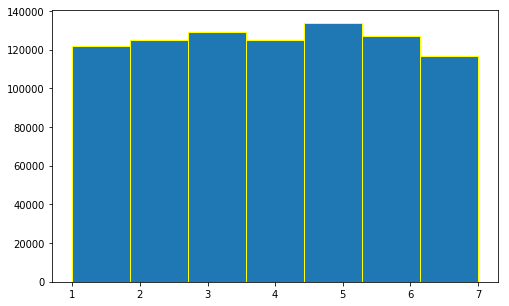

In [37]:
plt.figure(figsize=(8,5))
plt.hist(train_data['DayOfWeek'],bins=7,edgecolor='yellow')

In [25]:
train_data['Category'].head()

0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [26]:
train_data['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [27]:
train_data['Dates'].iloc[0]

'2015-05-13 23:53:00'

In [29]:
type(train_data['Dates'].iloc[0])

str

In [30]:
train_data['Dates'] = train_data['Dates'].apply(lambda x : pd.to_datetime(x))

In [31]:
train_data['Year'] = train_data['Dates'].apply(lambda x :x.year)
train_data['Month'] = train_data['Dates'].apply(lambda x:x.month)
train_data['DayOfMonth'] = train_data['Dates'].apply(lambda x: x.day)


(array([32167., 27471., 28691., 29905., 29557., 29482., 29685., 30339.,
        29502., 28395., 27952., 28223., 28580., 27670., 28224., 28146.,
        29031., 29793., 30012., 29963., 30038., 30589., 29547., 27987.,
        26932., 26870., 27577., 27269., 27108., 26589., 14755.]),
 array([ 1.        ,  1.96774194,  2.93548387,  3.90322581,  4.87096774,
         5.83870968,  6.80645161,  7.77419355,  8.74193548,  9.70967742,
        10.67741935, 11.64516129, 12.61290323, 13.58064516, 14.5483871 ,
        15.51612903, 16.48387097, 17.4516129 , 18.41935484, 19.38709677,
        20.35483871, 21.32258065, 22.29032258, 23.25806452, 24.22580645,
        25.19354839, 26.16129032, 27.12903226, 28.09677419, 29.06451613,
        30.03225806, 31.        ]),
 <a list of 31 Patch objects>)

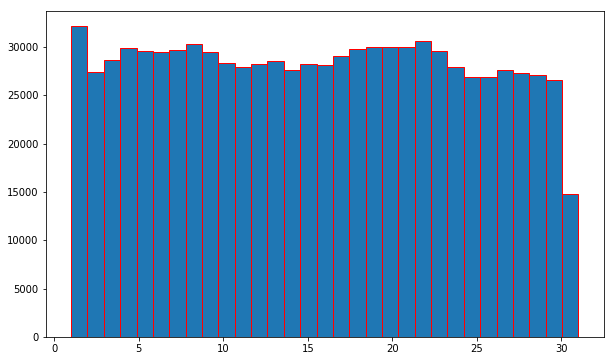

In [36]:
plt.figure(figsize=(10,6))
plt.hist(train_data['DayOfMonth'],bins=31,edgecolor='red')

(array([73902., 73422., 70779., 69909., 68015., 70174., 69000., 66542.,
        66619., 71731., 75606., 74766., 27584.]),
 array([2003.        , 2003.92307692, 2004.84615385, 2005.76923077,
        2006.69230769, 2007.61538462, 2008.53846154, 2009.46153846,
        2010.38461538, 2011.30769231, 2012.23076923, 2013.15384615,
        2014.07692308, 2015.        ]),
 <a list of 13 Patch objects>)

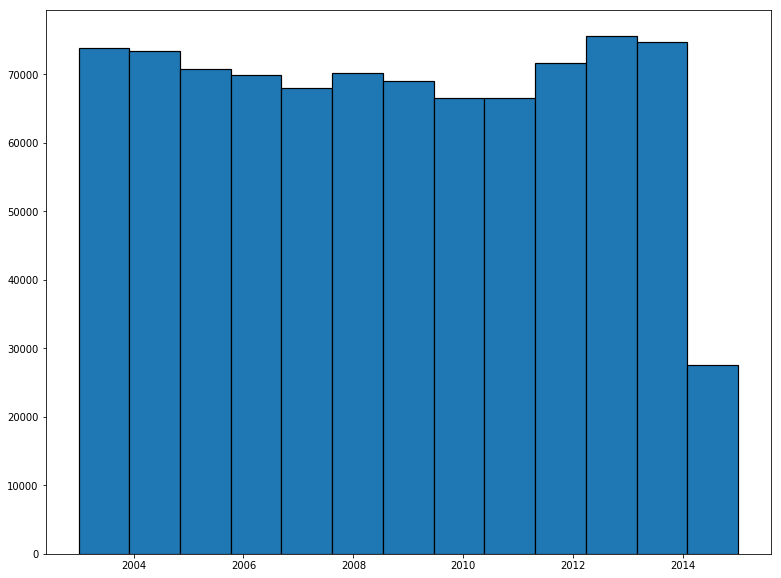

In [44]:
plt.figure(figsize=(13,10))
plt.hist(train_data['Year'],bins=13,edgecolor='black',linewidth=1.2)

In [45]:
train_data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'DayOfWeeky', 'Year', 'Month',
       'DayOfMonth'],
      dtype='object')

In [46]:
train_data['HourOfCrime']=train_data['Dates'].apply(lambda x : x.hour)

(array([44865., 26173., 22296., 14014.,  9863.,  8637., 13133., 22048.,
        32900., 35555., 37806., 38373., 51934., 43145., 44424., 48058.,
        50137., 53553., 55104., 49475., 44694., 43661., 45741., 42460.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

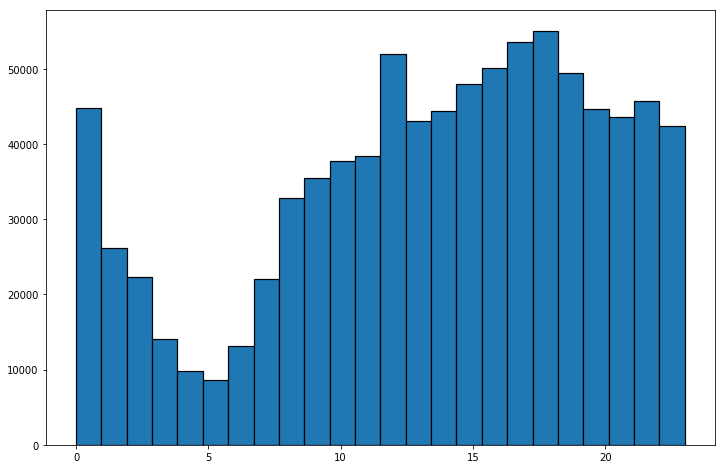

In [47]:
plt.figure(figsize=(12,8))
plt.hist(train_data['HourOfCrime'],bins=24,linewidth=1.2,edgecolor='black')

In [48]:
train_data['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

(array([ 89431.,  85460.,  78845., 119908., 105296.,  49313.,  45209.,
        157182.,  65596.,  81809.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

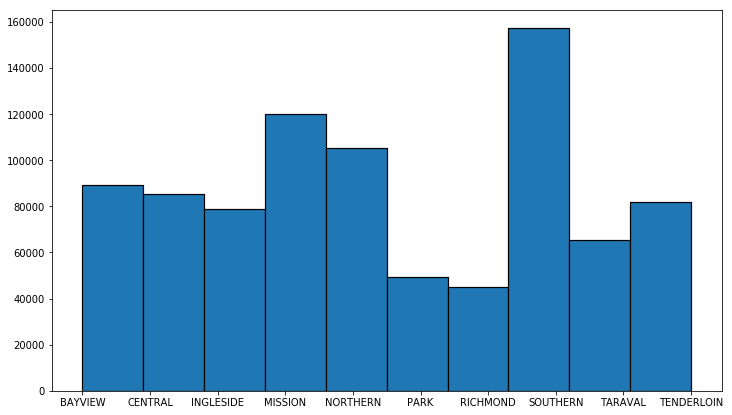

In [50]:
plt.figure(figsize=(12,7))
plt.hist(train_data['PdDistrict'],bins=10,edgecolor='black',linewidth=1.2)

In [51]:
districts = train_data['PdDistrict'].value_counts()

In [55]:
districts=districts.index

In [56]:
dic = {}
for i in range(len(districts)):
    dic[districts[i]]=i+1

In [57]:
train_data['PdDistrict']= train_data['PdDistrict'].map(dic)

In [58]:
train_data.PdDistrict.value_counts()

1     157182
2     119908
3     105296
4      89431
5      85460
6      81809
7      78845
8      65596
9      49313
10     45209
Name: PdDistrict, dtype: int64

In [59]:
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfWeeky,Year,Month,DayOfMonth,HourOfCrime
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,3,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,3,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,3,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,3,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,3,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,3,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,3,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,3,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,9,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,3,2015,5,13,23


In [60]:
train_data.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfWeeky,Year,Month,DayOfMonth,HourOfCrime
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,1,8,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,1,2003,1,6,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,1,7,NONE,600 Block of EDNA ST,-122.447364,37.731948,1,2003,1,6,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,1,1,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,1,2003,1,6,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",1,1,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,1,2003,1,6,0
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",1,4,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212,1,2003,1,6,0


In [61]:
train_data = train_data.drop(['Dates','Resolution'],axis=1)

In [62]:
train_data.head()

,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,DayOfWeeky,Year,Month,DayOfMonth,HourOfCrime
0,WARRANTS,WARRANT ARREST,3,3,OAK ST / LAGUNA ST,-122.425892,37.774599,3,2015,5,13,23
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,3,OAK ST / LAGUNA ST,-122.425892,37.774599,3,2015,5,13,23
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,3,VANNESS AV / GREENWICH ST,-122.424363,37.800414,3,2015,5,13,23
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,3,1500 Block of LOMBARD ST,-122.426995,37.800873,3,2015,5,13,23
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,9,100 Block of BRODERICK ST,-122.438738,37.771541,3,2015,5,13,23
